In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# load csv files into pandas dataframes
results = pd.read_csv('results_ECG.csv', sep=",") #pd.read_csv('sweep_results_EMG.csv', sep=",") #
targets = pd.read_csv('targets_ECG.csv', sep=",") #pd.read_csv('Sweep_targets_EMG.csv', sep=",") #

In [3]:
# column headers for each dataframe
display(list(results.columns.values)) 
display(list(targets.columns.values)) 
res_col_names = list(results.columns.values)
targ_col_names = list(targets.columns.values)

['transient',
 'rhos',
 'reg',
 'lis',
 'iss',
 'con',
 'Nr',
 'Nl',
 '.sampling',
 'MSE',
 'outputs',
 'MSE_std',
 'outputs_std']

['sampling rate', 'test_targets']

In [4]:
# this function converts a column that contains long string-lists in individual cells to a list of arrays
def make_arr(col_name):
    #samp_sweep = results.loc[results['.sampling'] == 1]
    if col_name == "test_targets":
        outputs = np.array(targets[col_name])
    else:
        outputs = np.array(results[col_name])

    out_mat = []
    for out in outputs:
        single = out.split(',')
        arr = []

        if col_name == "test_targets":
            for i in range(len(single)):
                if i == 0:
                    arr.append(float(single[i][2:len(single[i])]))
                elif i == len(single)-1:
                    arr.append(float(single[i][0:(len(single[i])-2)]))
                else:
                    arr.append(float(single[i]))
                out_mat.append(arr)

        else:
            for i in range(len(single)):
                if i == 0:
                    arr.append(float(single[i][1:len(single[i])]))
                elif i == len(single)-1:
                    arr.append(float(single[i][0:(len(single[i])-1)]))
                else:
                    arr.append(float(single[i]))
            out_mat.append(arr)

    return out_mat

In [5]:
# this function returns the configuration of a requested index
# included MSE values
# also prints configuration with column names
def get_config(index):
    config = []
    for i in range(9):
        print(res_col_names[i], " = ", results[res_col_names[i]][index])
        config.append(results[res_col_names[i]][index])
    print("self_fed_MSE = ", results[res_col_names[9]][index])
    config.append(results[res_col_names[9]][index])
    print("signal_fed_MSE = ", results[res_col_names[11]][index])
    config.append(results[res_col_names[11]][index])
    return config

In [6]:
# necessary columns to convert for results.csv
# renamed for qualitative clarity
# first index corresponds which configuration is used
self_fed_mat = make_arr("outputs")
signal_fed_mat = make_arr("outputs_std")

In [7]:
# conversion for targets
orig_signal_mat = make_arr("test_targets")

In [8]:
# collect standard deviations

self_fed_std = []
signal_fed_std = []
orig_signal_std = np.std(orig_signal_mat[0])

for i in range(len(self_fed_mat[0])):
    self_fed_std.append(np.std(self_fed_mat[i]))
    signal_fed_std.append(np.std(signal_fed_mat[i]))

In [9]:
print(f"\nThe std for the original signal is {np.std(orig_signal_mat[0])}\n\n")

print(f"The max std for self-fed is {np.amax(self_fed_std)} at index {np.argmax(self_fed_std)}")
print(f"The max std for signal-fed is {np.amax(signal_fed_std)} at index {np.argmax(signal_fed_std)}\n\n")

print(f"The min std for self-fed is {np.amin(self_fed_std)} at index {np.argmin(self_fed_std)}")
print(f"The min std for signal-fed is {np.amin(signal_fed_std)} at index {np.argmin(signal_fed_std)}\n\n")

print(f"The max MSE for self-fed is {np.amax(results['MSE'])} at index {np.argmax(results['MSE'])}")
print(f"The max MSE for signal-fed is {np.amax(results['MSE_std'])} at index {np.argmax(results['MSE_std'])}\n\n")

print(f"The min MSE for self-fed is {np.amin(results['MSE'])} at index {np.argmin(results['MSE'])}")
print(f"The min MSE for signal-fed is {np.amin(results['MSE_std'])} at index {np.argmin(results['MSE_std'])}")


The std for the original signal is 0.13431803288505528


The max std for self-fed is 14.100559371193786 at index 3621
The max std for signal-fed is 0.7895814598361249 at index 3728


The min std for self-fed is 0.0 at index 18
The min std for signal-fed is 0.0 at index 18


The max MSE for self-fed is 3707.278283144964 at index 6361
The max MSE for signal-fed is 5.106160398874695 at index 4263


The min MSE for self-fed is 0.0180228152752008 at index 1087
The min MSE for signal-fed is 4.266255613677511e-05 at index 520


In [10]:
count = 0
ostd = np.std(orig_signal_mat[0])
for i in range(len(orig_signal_mat[0])-1):
    if orig_signal_mat[0][i] < ostd and orig_signal_mat[0][i+1] > ostd:
        count += 1
print(count)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

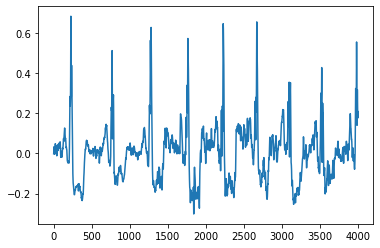

In [11]:
plt.plot(orig_signal_mat[0][:500])
plt.show()

In [ ]:
max_std_sig = get_config(1331)

In [ ]:
# Compile a list of models for a given range of standard deviations
med_fed_std = []
for i in range(len(self_fed_std)):
    if self_fed_std[i] > .1 and self_fed_std[i] <= .16 and np.amax(self_fed_mat[i]) < .8 and np.amax(self_fed_mat[i]) > .4 and np.amin(self_fed_mat[i]) > -.4 and np.amin(self_fed_mat[i]) < -.2:
        med_fed_std.append(i)
print(len(med_fed_std))

In [13]:
print(np.std(orig_signal_mat[0]))
print(np.std(self_fed_mat[87]))
print(med_fed_std[21])

0.13431803288505528
0.2956645333161147
2056


In [12]:
from tempfile import TemporaryFile
outfile = TemporaryFile()

np.save(outfile, self_fed_mat)

with open('test.npy', 'wb') as f:
    np.save(f, self_fed_mat)
    np.save(f, self_fed_mat)

In [14]:
print(med_fed_std[4])

928


In [15]:
top_models = [731, 1331, 1861, 1702, 301, 366] # for ecg data (searched for std of .12 and above--incomplete)

In [16]:
for i in top_models:
    max_std_sig = get_config(i)

transient  =  1000
rhos  =  1.0
reg  =  1.0
lis  =  0.1
iss  =  1.0
con  =  0.2
Nr  =  100
Nl  =  2
.sampling  =  1
self_fed_MSE =  0.0303802355248068
signal_fed_MSE =  0.0007959879895373
transient  =  1000
rhos  =  1.0
reg  =  1.0
lis  =  0.1
iss  =  1.0
con  =  0.5
Nr  =  100
Nl  =  5
.sampling  =  1
self_fed_MSE =  0.0360946752052509
signal_fed_MSE =  0.0007159955916393
transient  =  1000
rhos  =  1.0
reg  =  0.01
lis  =  0.1
iss  =  1.0
con  =  0.5
Nr  =  100
Nl  =  10
.sampling  =  1
self_fed_MSE =  19.95424749180115
signal_fed_MSE =  0.0003612340471258
transient  =  1000
rhos  =  1.2
reg  =  0.01
lis  =  0.2
iss  =  1.0
con  =  0.5
Nr  =  10
Nl  =  10
.sampling  =  1
self_fed_MSE =  0.9897491585737306
signal_fed_MSE =  0.00088230897685
transient  =  1000
rhos  =  1.0
reg  =  0.01
lis  =  0.1
iss  =  1.0
con  =  1.0
Nr  =  100
Nl  =  1
.sampling  =  1
self_fed_MSE =  0.3021035701697875
signal_fed_MSE =  0.0001562943896293
transient  =  1000
rhos  =  1.0
reg  =  0.1
lis  =  0.1
iss

In [42]:
get_config(731)
print("\n")

transient  =  1000
rhos  =  1.0
reg  =  1.0
lis  =  0.1
iss  =  1.0
con  =  0.2
Nr  =  100
Nl  =  2
.sampling  =  1
self_fed_MSE =  0.0303802355248068
signal_fed_MSE =  0.0007959879895373




In [43]:
print("hello")
rho_sweep = results.loc[results['rhos'] == 1]
reg_sweep = rho_sweep.loc[rho_sweep['reg'] == 1]
lis_sweep = reg_sweep.loc[reg_sweep['lis'] == .1]
iss_sweep = lis_sweep.loc[lis_sweep['iss'] == 1]
Nr_sweep = iss_sweep.loc[iss_sweep['Nr'] == 100]
con_sweep = Nr_sweep.loc[Nr_sweep['con'] == .2]
Nl_sweep = con_sweep.loc[con_sweep['Nl'] == 10].reset_index()
print(Nr_sweep["index"])

hello


KeyError: 'index'

In [55]:
print("hello")
rho_sweep = results.loc[results['rhos'] == 1]
reg_sweep = rho_sweep.loc[rho_sweep['reg'] == 1]
lis_sweep = reg_sweep.loc[reg_sweep['lis'] == .1]
iss_sweep = lis_sweep.loc[lis_sweep['iss'] == 1]
Nr_sweep = iss_sweep.loc[iss_sweep['Nr'] == 100]
con_sweep = Nr_sweep.loc[Nr_sweep['con'] == .2]
Nl_sweep = con_sweep.loc[con_sweep['Nl'] == 10].reset_index()
print(Nl_sweep["index"])
sweep_check = 

hello
0     191
1    2351
2    4511
Name: index, dtype: int64


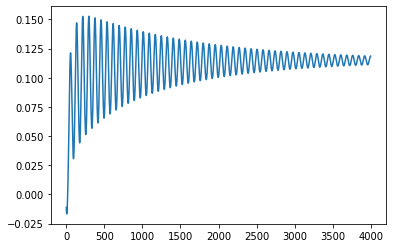

transient  =  1000
rhos  =  1.0
reg  =  1.0
lis  =  0.1
iss  =  1.0
con  =  0.2
Nr  =  100
Nl  =  1
.sampling  =  1
self_fed_MSE =  0.0295044765187711
signal_fed_MSE =  0.0007776303698293
[1000, 1.0, 1.0, 0.1, 1.0, 0.2, 100, 1, 1, 0.0295044765187711, 0.0007776303698293]


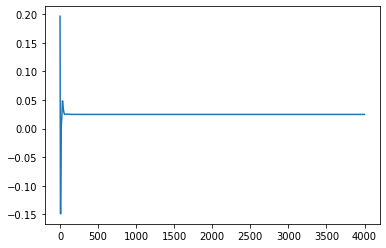

transient  =  1000
rhos  =  1.0
reg  =  1.0
lis  =  0.1
iss  =  1.0
con  =  0.2
Nr  =  100
Nl  =  1
.sampling  =  10
self_fed_MSE =  0.0212971260825986
signal_fed_MSE =  0.0081554112122188
[1000, 1.0, 1.0, 0.1, 1.0, 0.2, 100, 1, 10, 0.0212971260825986, 0.0081554112122188]


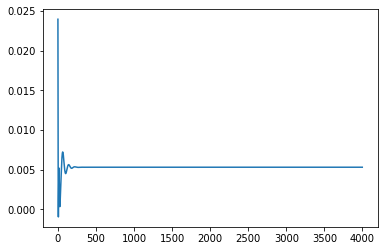

transient  =  1000
rhos  =  1.0
reg  =  1.0
lis  =  0.1
iss  =  1.0
con  =  0.2
Nr  =  100
Nl  =  1
.sampling  =  30
self_fed_MSE =  0.0211074683132578
signal_fed_MSE =  0.0156366474926112
[1000, 1.0, 1.0, 0.1, 1.0, 0.2, 100, 1, 30, 0.0211074683132578, 0.0156366474926112]


In [56]:
for i in range(len(sweep_check)):
    plt.plot(self_fed_mat[sweep_check[i]])
    plt.show()
    print(get_config(sweep_check[i]))

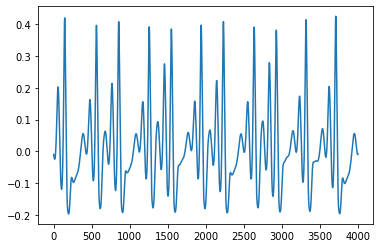

transient  =  1000
rhos  =  1.0
reg  =  1.0
lis  =  0.1
iss  =  1.0
con  =  0.2
Nr  =  100
Nl  =  2
.sampling  =  1
self_fed_MSE =  0.0303802355248068
signal_fed_MSE =  0.0007959879895373


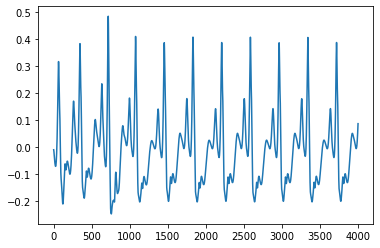

transient  =  1000
rhos  =  1.0
reg  =  1.0
lis  =  0.1
iss  =  1.0
con  =  0.5
Nr  =  100
Nl  =  5
.sampling  =  1
self_fed_MSE =  0.0360946752052509
signal_fed_MSE =  0.0007159955916393


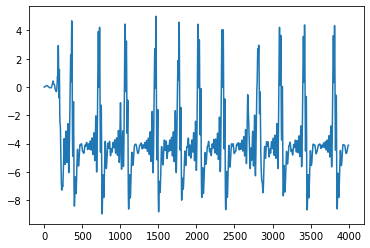

transient  =  1000
rhos  =  1.0
reg  =  0.01
lis  =  0.1
iss  =  1.0
con  =  0.5
Nr  =  100
Nl  =  10
.sampling  =  1
self_fed_MSE =  19.95424749180115
signal_fed_MSE =  0.0003612340471258


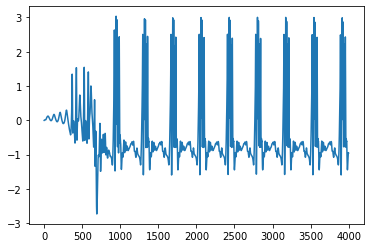

transient  =  1000
rhos  =  1.2
reg  =  0.01
lis  =  0.2
iss  =  1.0
con  =  0.5
Nr  =  10
Nl  =  10
.sampling  =  1
self_fed_MSE =  0.9897491585737306
signal_fed_MSE =  0.00088230897685


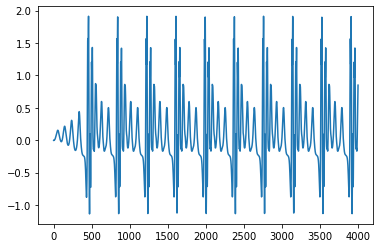

transient  =  1000
rhos  =  1.0
reg  =  0.01
lis  =  0.1
iss  =  1.0
con  =  1.0
Nr  =  100
Nl  =  1
.sampling  =  1
self_fed_MSE =  0.3021035701697875
signal_fed_MSE =  0.0001562943896293


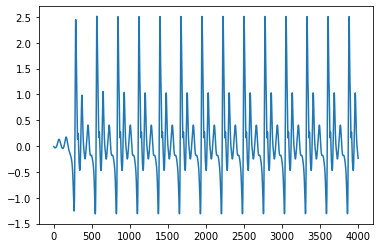

transient  =  1000
rhos  =  1.0
reg  =  0.1
lis  =  0.1
iss  =  1.0
con  =  0.2
Nr  =  200
Nl  =  1
.sampling  =  1
self_fed_MSE =  0.5006981354766766
signal_fed_MSE =  0.0003684725085402


In [232]:
for i in top_models:
    plt.plot(self_fed_mat[i])
    plt.show()
    get_config(i)

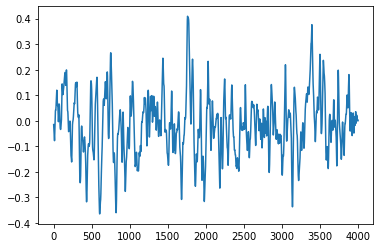

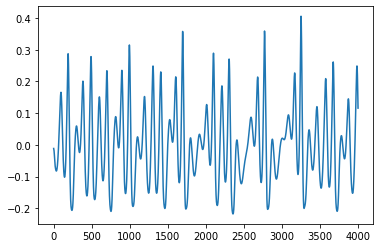

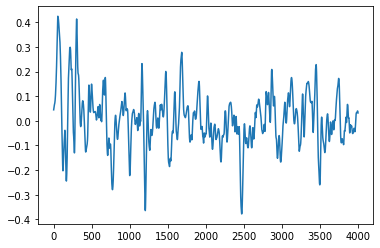

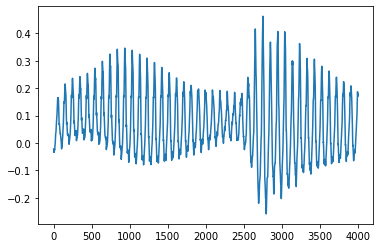

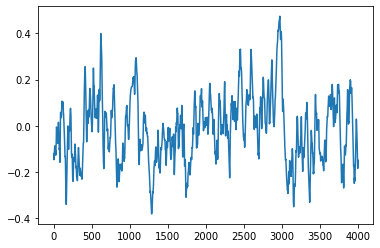

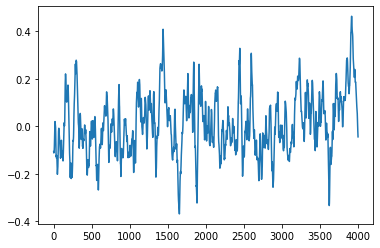

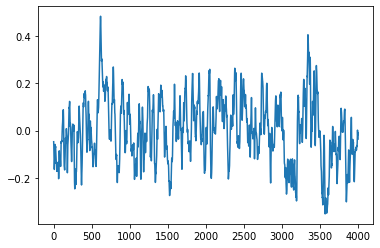

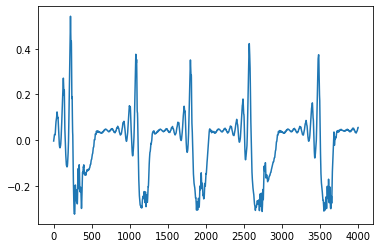

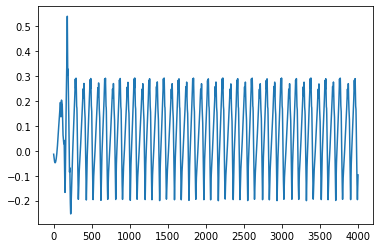

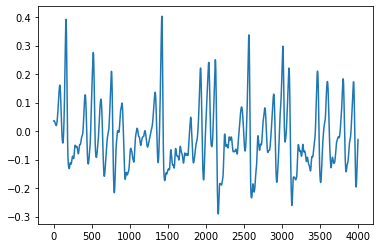

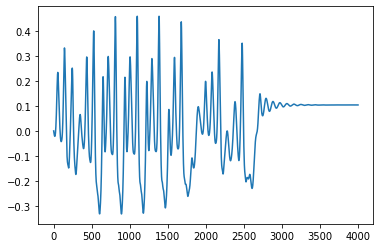

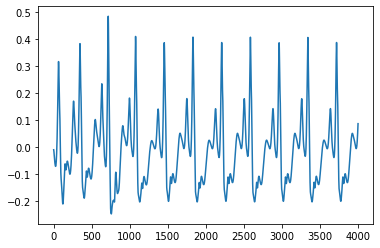

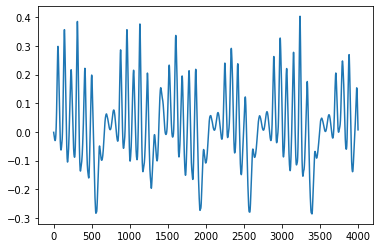

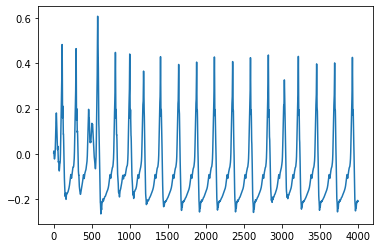

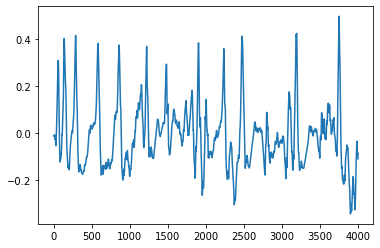

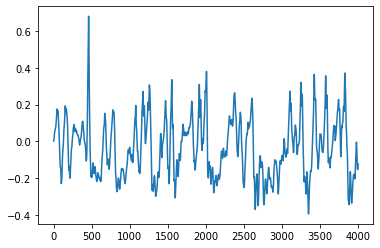

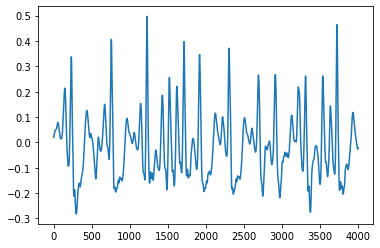

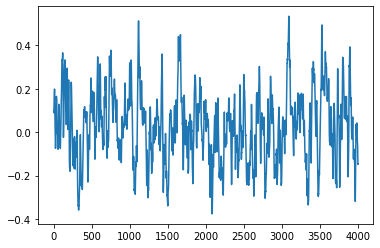

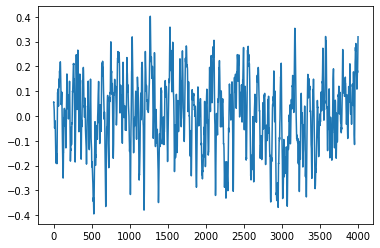

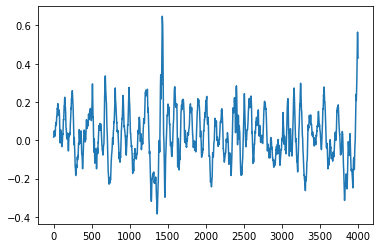

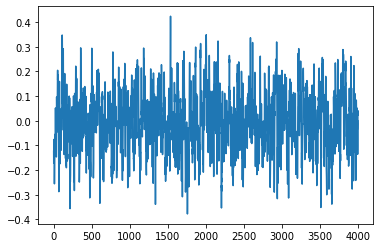

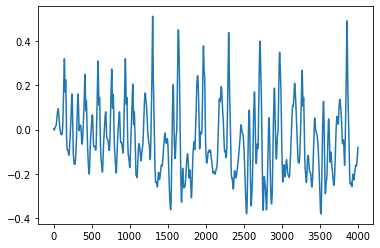

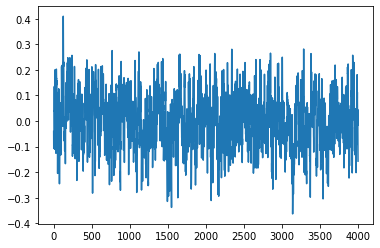

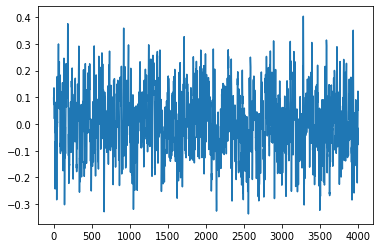

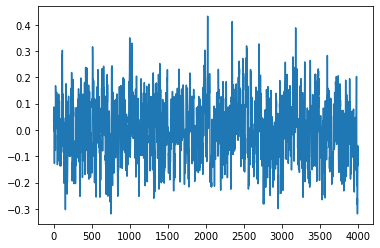

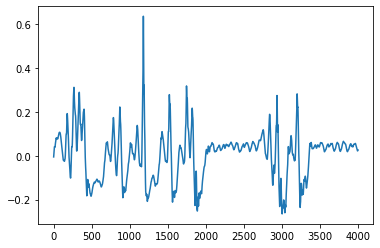

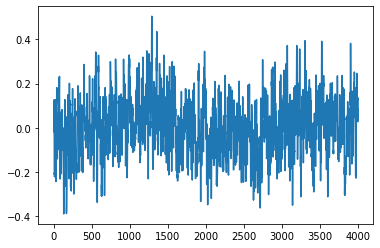

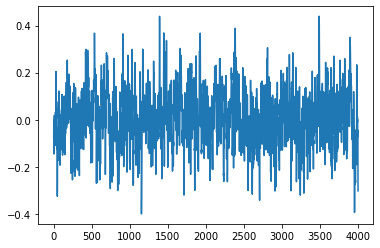

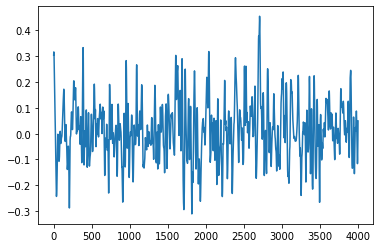

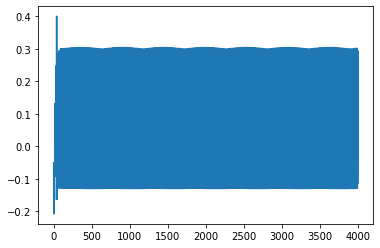

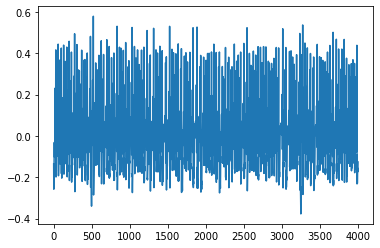

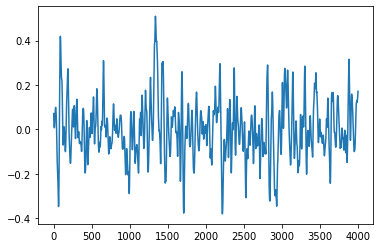

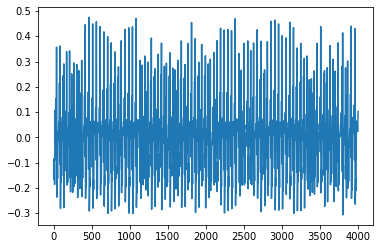

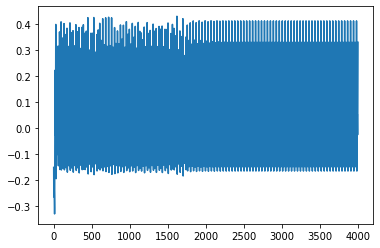

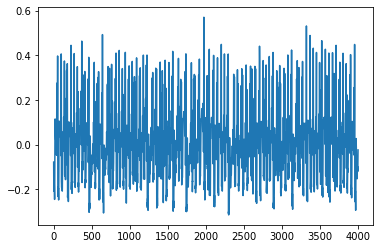

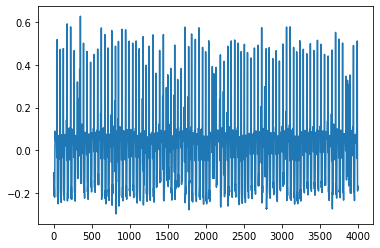

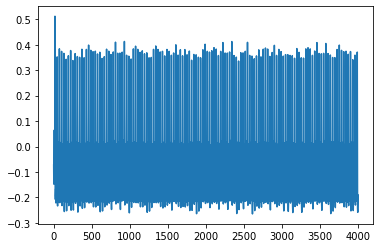

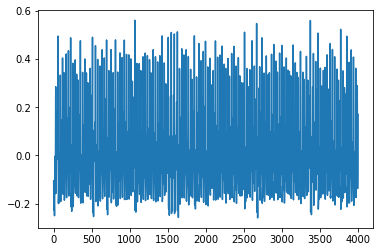

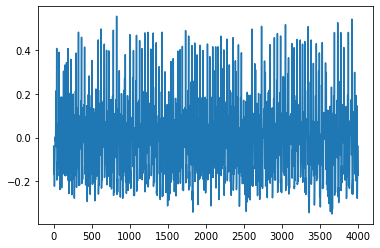

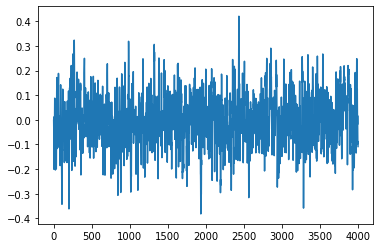

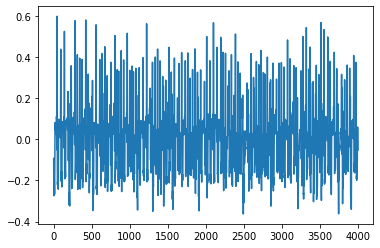

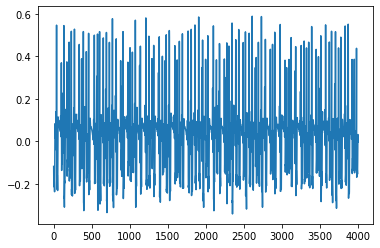

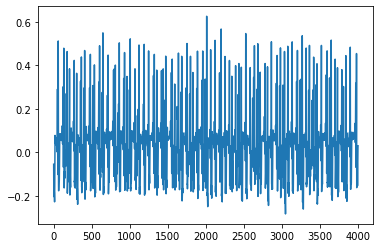

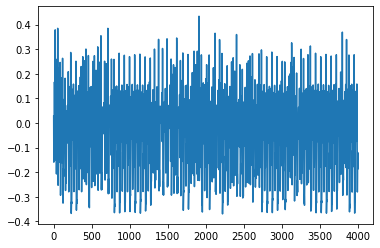

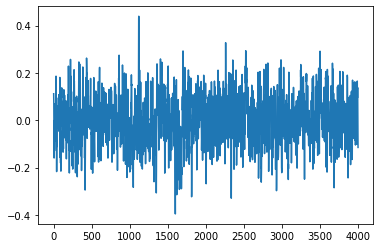

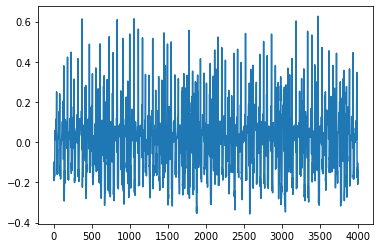

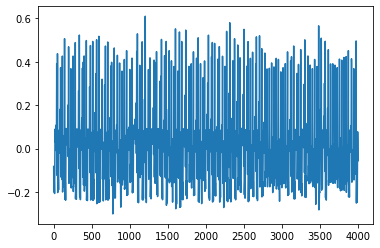

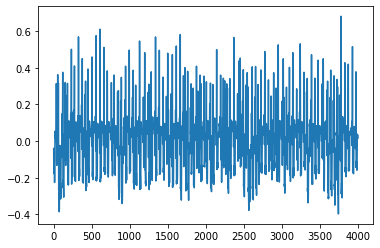

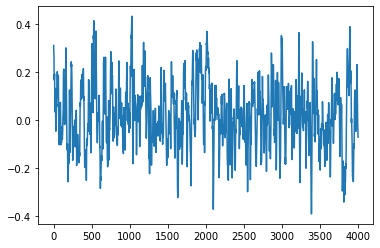

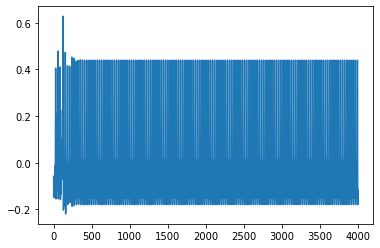

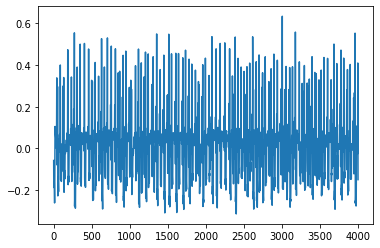

In [228]:
for i in med_fed_std:
    plt.plot(self_fed_mat[i])
    plt.show()

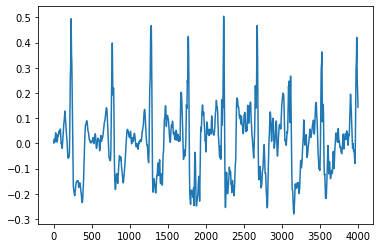

In [68]:
# for i in range(100):
#     plt.plot(signal_fed_mat[i])
plt.plot(signal_fed_mat[87])
plt.show()

In [ ]:
np.std(orig_signal_mat[0])

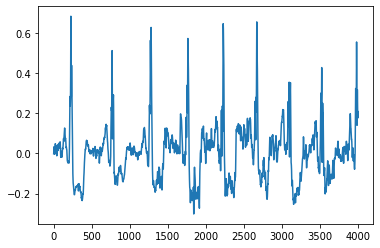

In [71]:
# for i in range(1):
#     plt.plot(orig_signal_mat[i])
plt.plot(orig_signal_mat[0])
plt.show()

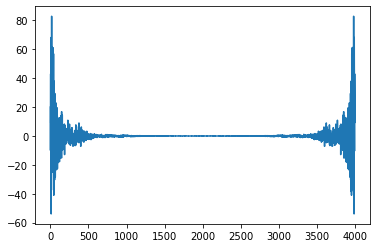

In [70]:
np.fft.fft(orig_signal_mat[i]).shape
plt.plot(np.fft.fft(orig_signal_mat[i]))
plt.show()